# Unsupervised Learning with Principal Component Analysis

**Goals:** 

- What is PCA (Principal Component Analysis)? How it works and how to use it.
- Visualize and interpret PCA-transformed data
- Work with PCA-transformed data for classification and clustering purposes


## Image 1

![a](images/pca_image.jpeg)

## Image 2

![we](images/pca_image_transformed.jpeg)

**What is the difference between the two images???**

**Answer:** The first image is the high-quality version and the second is the low quality. The first is 16MB and the second 1.2MB

<br>

Given that information, is it fair to say that these two images are effectively the same?

## PCA (Principal Component Analysis)
--- 

* Dimension Reductionality technique that when faced with a large set of correlated variables, allow us to summarize this set with a smaller number of representative variables that **collectively** explain most of the variability in the original set.
* The quintessential "dimensionality reduction" algorithm, where _"dimensionality reduction"_ = process of combining or collapsing your existing features (columns in $X$) into new features that retain the signal in the original data in fewer variables while ideally reducing noise.
* **PCA** is an unsupervised approach, since it involves only a set of features $X_1$, $X_2$, . . . , $X_p$, and no associated response $Y$ 
* **PCA** produces derived variables to use in supervised methods and is also a tool for data visualization. Imagine being able to visualize a 100-dimension dataset on a 2D scatter plot.

- Like the two images above the PCA can transform data with 100 dimensions into 2 while retaining the "essence" of the original data. 



From [Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#introduction):

"The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information."

* The idea is that each of the $n$ observations lives in $p$-dimensional space, but not all of these dimensions are equally interesting.
* Each of the dimensions found by **PCA** is a linear combination of the $p$ features, so the first principal component of a set of features $X_1$, $X_2$, . . . , $X_p$ is the **normalized** linear combination of the features:
$$Z_1 = φ_{11}X_1 +φ_{21}X_2 +...+φ_{p1}X_p$$
that have the **largest variance**  
The elements $φ_{11}$,...,$φ_{p1}$ are the loadings of the **first** PCA, **AND** together these loadings make up the principal component loading vector whose **SUM** is equal to **1**: $$φ_1 = (φ_{11}  φ_{21} ... φ_{p1})^T$$

### The process
---
* Linearly transform an $𝑁$×$𝑑$ matrix $𝑋$ into an $𝑁$×$𝑚$ matrix $𝑌$
    * Centralized the data (subtract the mean). 
    * Calculate the $𝑑$×$𝑑$ covariance matrix: $$𝐶 = \frac1{N-1} X^T X$$
        * $C_{ij}$ =  $\frac1{N-1}$ $\sum_{q=1}^N$ $X_{q,i}$ $X_{q,i}$ 
        * $C_{i,i}$ (diagonal) is the variance of variable $i$
        * $C_{i,j}$ (off-diagonal) is the covariance between variables $i$ and $j$
    * Calculate the **eigenvectors** of the covariance matrix
         * An **eigenvector** specifies a direction through the original coordinate space. 
    * Select $m$ **eigenvectors** that correspond to the **largest $m$ eigenvalues** to be the new basis.
         * The eigenvector with the highest correspoding **eigenvalue** is the first principal component.
         * **Eigenvalues** indicate the amount of variance in the direction of it's corresponding eigenvector

### Eigenvectors
---
* If $A$ is a **square matrix**, a non-zero vector **$v$** is an **eigenvector** of $A$ if there is a scalar $λ$ **(eigenvalue)** such that $$Av = λv$$

* For example:
$$ Av = 
\left(\begin{array}{cc} 
2 & 3\\
2 & 1
\end{array}\right) *
\left(\begin{array}{cc} 
3 \\ 
2 
\end{array}\right) = 
\left(\begin{array}{cc} 
12 \\
8
\end{array}\right) = 
4
\left(\begin{array}{cc} 
3 \\
2
\end{array}\right)
= λv
$$ 
$~$
* If you think of the squared matrix $A$ as a transformation matrix, then multiply it with the **eigenvector do not change its direction.**

<a href = http://setosa.io/ev/eigenvectors-and-eigenvalues/> Please see Eigenvectors and Eigenvalues Visually </a>

### Visualizing the principal components
---

![](https://snag.gy/ECsJye.jpg)
*Image from Introduction to Statistical Learning*

### Summary
---

* What is a principal component? **Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes constructs new variables that are optimized to explain as much variance as possible and to be independent (uncorrelated).

* Creating these variables is a well-defined mathematical process, but in essence **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

* Eigenvectors: The direction of the components

* Eigenvalues: The lenght of the Eigenvectors, every eigenvector has an Eigenvalue. The magnitude of the Eigenvector encodes the proportion of total variance explained by a component. The whole variance is the same as the number of variables in the PCA. A value of 1 mean it explains as much variance as one variable. >1 means a component explains more variance than a single variable.

* We can reduce the number of dimensions (remove bottom number of components) and lose the least possible amount of variance information in our data.
* Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
* The directions of largest variance should have the highest Signal to Noise ratio.
* Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.
---
![](https://snag.gy/0Hur9o.jpg)
*Image from http://setosa.io/ev/principal-component-analysis/*

## PCA Lesson Adapted from Sebastian Raschka

In [210]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_digits

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

plt.style.use('fivethirtyeight')

We're going to do a walkthrough on this lesson adapted from [Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#introduction) on how to use PCA with the Iris dataset.

### 1. Standardize the data

In [2]:
#Load data and assign X and y

path = "../../data/iris.csv"

iris = pd.read_csv(path)

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris.drop('species', axis=1)
y = iris.species

In [4]:
#Standardize the data

ss = StandardScaler()

Xs = ss.fit_transform(X)


In [5]:
Xs

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### 2. Eigendecomposition - Computing Eigenvectors and Eigenvalues

"The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes."

**Covariance Matrix**
"The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:"

\begin{align}
\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).
\end{align}

We can summarize the calculation of the covariance matrix via the following matrix equation:

\begin{align}
\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)
\end{align}

Where x¯ is the mean vector \begin{align}\mathbf{\bar{x}} = \sum\limits_{k=1}^n x_{i}.\end{align}

The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [6]:
#Use numpy 

mean_vec = np.mean(Xs, axis=0)

#The mean value of each column
mean_vec

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [7]:
#Manually Calculate the covariance matrix
cov_mat = (Xs - mean_vec).T.dot((Xs - mean_vec))/(Xs.shape[0]-1)

cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [8]:
#Use numpy
cov_mat = np.cov(Xs.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [9]:
#Derive eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [10]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

**Correlation Matrix**

"Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix:"

In [11]:
cor_mat1 = np.corrcoef(Xs.T)
cor_mat1

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

In [13]:
#Eigenvectors
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [14]:
#Eigenvalues
eig_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

### 3. Selecting Principal Components

"The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes."

"In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top `k` eigenvectors."

In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(2.910818083752054,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072252,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050952,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235625158,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [16]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

In [17]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752054
0.9212209307072252
0.1473532783050952
0.020607707235625158


After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [18]:
cumeig = np.cumsum(eig_vals)
cumeig

array([2.91081808, 3.83203901, 3.97939229, 4.        ])

In [19]:
tot = sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp

[72.77045209380137, 23.030523267680632, 3.6838319576273806, 0.5151926808906291]

In [20]:
cumvar  = np.cumsum(var_exp)
cumvar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

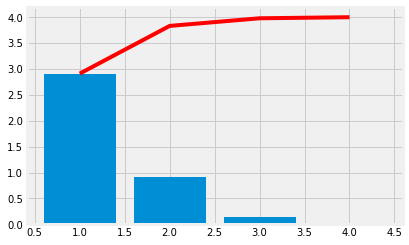

In [21]:
#Plotting variance explained and cumulative variance explained

plt.bar([1,2,3,4],eig_vals)
plt.plot([1,2,3,4], cumeig, c='r')


Note: Total of eigen values is equal to the total no. of features

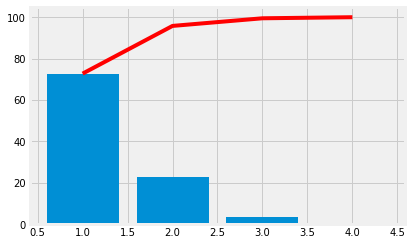

In [22]:
plt.bar([1,2,3,4],var_exp)
plt.plot([1,2,3,4], cumvar, c='r')

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

It's about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our `d×k`-dimensional eigenvector matrix `W`.

In [23]:
eig_pairs

[(2.910818083752054,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072252,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050952,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235625158,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [24]:
eig_pairs[0][1].reshape(4,1)

array([[ 0.52237162],
       [-0.26335492],
       [ 0.58125401],
       [ 0.56561105]])

In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                    eig_pairs[1][1].reshape(4,1)))
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

### 4. Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix `W` to transform our samples onto the new subspace via the equation
`Y=X×W`, where `Y` is a 150×2 matrix of our transformed samples.

In [26]:
Xs[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [27]:
Xs.shape

(150, 4)

In [28]:
matrix_w.shape

(4, 2)

In [29]:
#Take the dot product of Xs and matrix_w
Y = Xs.dot(matrix_w)
Y

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [30]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [32]:
Xs.shape

(150, 4)

In [33]:
y.shape

(150,)

In [37]:
Y[:,0].shape

(150,)

In [38]:
Y[:,1].shape

(150,)

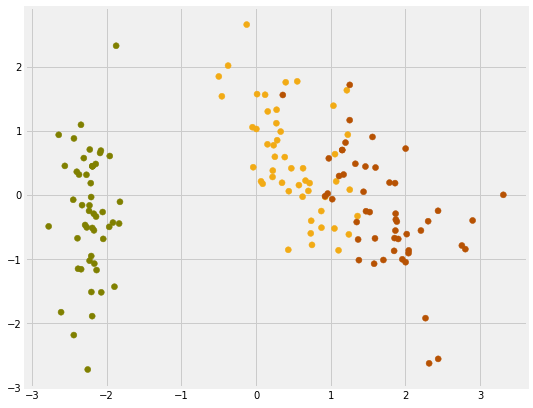

In [60]:
#Plot components with color-encoding

colors = y.map({"Iris-setosa": "olive", "Iris-virginica": "#b75203", "Iris-versicolor": "#f2ab15"})
plt.figure(figsize=(8, 7))
# plt.scatter(Xs, y, c=colors)
plt.scatter(Y[:,0], Y[:,1], c=colors)

## PCA in Sklearn with Iris, the NBA, and Digits

We're going to learn how to use PCA with the Iris, NBA 16/17 stats, and MNIST digits datasets.

### Iris

Let's use the pairplot of iris to compare what that looks like to the two components pca scatter plot

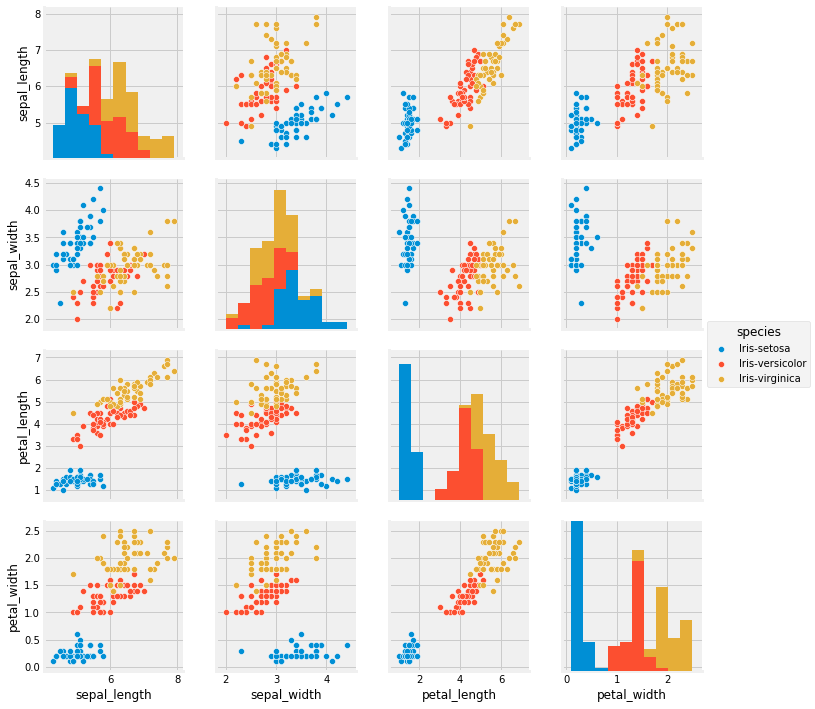

In [64]:
#Pairplot of iris data with species color-encoding

sns.pairplot(iris, hue='species')


As we know, we can't visualize a four-dimensional dataset, the pairplot gives use the next best thing, which is visualizing the four-dimensional dataset from as many different perspectives as possible.

Now let's compare this pairplot with a scatter plot of the iris' data two principal components.

In [67]:
#Initialize pca object with 4 components

pca = PCA(n_components=4)


#Fit and transform scaled iris data using pca
iris_pca = pca.fit_transform(Xs)

iris_pca

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

In [71]:
# the components_ are the eigenvectors. For now, just know that we are using 
# them to transform the data.

first_pc = pca.components_[0]
second_pc = pca.components_[1]

first_pc

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [72]:
second_pc

array([0.37231836, 0.92555649, 0.02109478, 0.06541577])

In [73]:
#Explained variance

pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [74]:
#Explained variance ratio
pca.explained_variance_ratio_


array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [75]:
pca.explained_variance_ratio_.cumsum()


array([0.72770452, 0.95800975, 0.99484807, 1.        ])

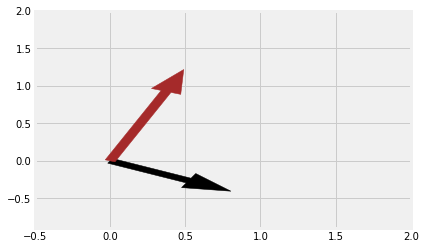

In [77]:
# The points presented above indicates the direction of each PCA. lets plot them to see the direction of each 

x1 = pca.components_[0][0]
x2 = pca.components_[0][1]

y1 = pca.components_[1][0]
y2 = pca.components_[1][1]

plt.axis([-.5, 2, -0.9, 2])
plt.arrow(0,0,x1,x2, color = 'black', width = .07)
plt.arrow(0,0,y1,y2, color = 'brown', width = .07)

 The black arrow shows the direction of the first principal component. the graph above shows the projections of the data into those axes.

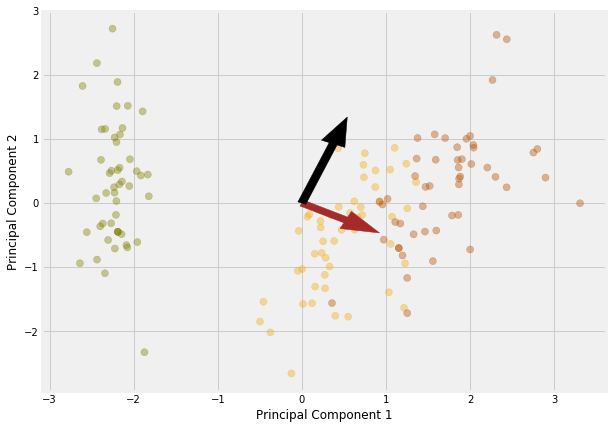

In [79]:
plt.figure(figsize=(9, 7))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c = colors, alpha=.4, s = 50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.arrow(0,0,x1,x2, color = 'brown', width = .1)
plt.arrow(0,0,y1,y2, color = 'black', width = .1)


### NBA Player data

In [128]:
#Load in the wine data
path = '../../data/nba_player_data_1617.csv'

nba = pd.read_csv(path, index_col=0)

nba.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
Russell Westbrook,81,34.6,31.6,10.2,24.0,42.5,2.5,7.2,34.3,8.8,10.4,84.5,1.7,9.0,10.7,10.4,1.6,0.4,5.4,33.8
James Harden,81,36.4,29.1,8.3,18.9,44.0,3.2,9.3,34.7,9.2,10.9,84.7,1.2,7.0,8.1,11.2,1.5,0.5,5.7,32.4
Isaiah Thomas,76,33.8,28.9,9.0,19.4,46.3,3.2,8.5,37.9,7.8,8.5,90.9,0.6,2.1,2.7,5.9,0.9,0.2,2.8,24.7
Anthony Davis,75,36.1,28.0,10.3,20.3,50.5,0.5,1.8,29.9,6.9,8.6,80.2,2.3,9.5,11.8,2.1,1.3,2.2,2.4,31.1
DeMar DeRozan,74,35.4,27.3,9.7,20.9,46.7,0.4,1.7,26.6,7.4,8.7,84.2,0.9,4.3,5.2,3.9,1.1,0.2,2.4,22.7


In [129]:
#Filter dataset

cols = ["PTS", "OREB", "REB", "AST", "STL", "BLK", "TOV", "MIN", "EFF"]

nba = nba[cols]

nba.head()


,PTS,OREB,REB,AST,STL,BLK,TOV,MIN,EFF
Russell Westbrook,31.6,1.7,10.7,10.4,1.6,0.4,5.4,34.6,33.8
James Harden,29.1,1.2,8.1,11.2,1.5,0.5,5.7,36.4,32.4
Isaiah Thomas,28.9,0.6,2.7,5.9,0.9,0.2,2.8,33.8,24.7
Anthony Davis,28.0,2.3,11.8,2.1,1.3,2.2,2.4,36.1,31.1
DeMar DeRozan,27.3,0.9,5.2,3.9,1.1,0.2,2.4,35.4,22.7


In [130]:
#rename columns

nba.columns = ["points", "offensive_rebs", "total_rebounds", "assists", "steals", "blocks",
              "turnovers", "minutes", "efficiency"]

First let's examine the correlations between variables

In [131]:
#Correlation heatmap

nba.corr()

,points,offensive_rebs,total_rebounds,assists,steals,blocks,turnovers,minutes,efficiency
points,1.000000,0.194430,0.444177,0.591217,0.513174,0.244027,0.795541,0.833035,0.894996
offensive_rebs,0.194430,1.000000,0.878663,-0.135596,0.061734,0.666489,0.166197,0.236639,0.489487
total_rebounds,0.444177,0.878663,1.000000,0.090435,0.257066,0.709474,0.400776,0.481297,0.731441
assists,0.591217,-0.135596,0.090435,1.000000,0.634580,-0.075879,0.828330,0.562189,0.608225
steals,0.513174,0.061734,0.257066,0.634580,1.000000,0.101148,0.602735,0.640755,0.575982
blocks,0.244027,0.666489,0.709474,-0.075879,0.101148,1.000000,0.186895,0.277724,0.487780
turnovers,0.795541,0.166197,0.400776,0.828330,0.602735,0.186895,1.000000,0.684116,0.791712
minutes,0.833035,0.236639,0.481297,0.562189,0.640755,0.277724,0.684116,1.000000,0.814198
efficiency,0.894996,0.489487,0.731441,0.608225,0.575982,0.487780,0.791712,0.814198,1.000000


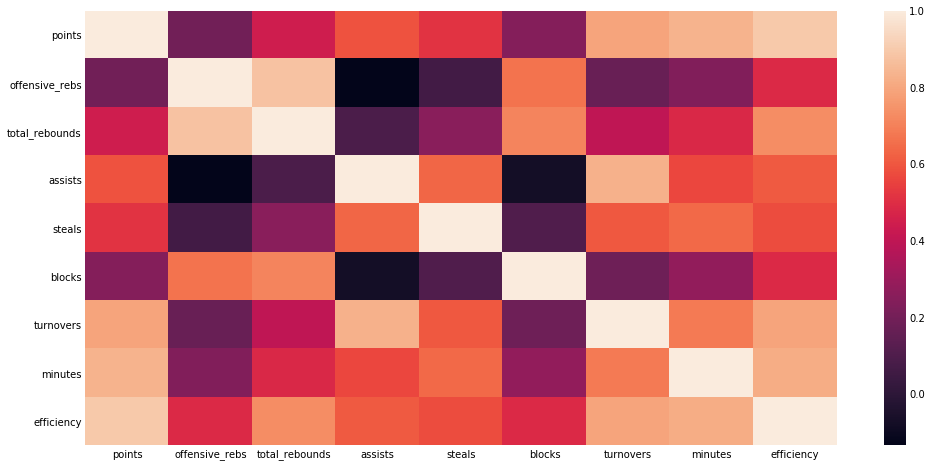

In [132]:
plt.figure(figsize=(15,8))
sns.heatmap(nba.corr())

What do you make of this plot?

One benefit of PCA is that it can deal with multicollinearity pretty well because multicollinearity simply means that you have excess dimensions in your data.

Let's go ahead and transform our data with PCA. But first we have to standardize it.

In [133]:
#Intialize scaler

ss = StandardScaler()


#Fit and transform wine data using standard scaler

Xs = ss.fit_transform(nba)


In [134]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone

pca = PCA()


#Fit and transform wine_s use pca

nba_pca = pca.fit_transform(Xs)

#Number of components
pca.n_components_


9

We did not reduce any of the dimensions of the dataset because we are going to visualize how much variance is explained by all 9 dimensions.

Plot the variance explained ratio of the components

In [135]:
#Shows the percentage of the variance explained by each component

pca.explained_variance_

array([5.06408585, 2.2644199 , 0.53308642, 0.45380229, 0.37409849,
       0.15353813, 0.10813828, 0.07664667, 0.00551731])

In [136]:
pca.explained_variance_ratio_

array([0.56059991, 0.25067379, 0.05901326, 0.05023642, 0.04141312,
       0.01699684, 0.01197103, 0.00848487, 0.00061077])

In [137]:
pca.explained_variance_.cumsum()

array([5.06408585, 7.32850574, 7.86159217, 8.31539446, 8.68949295,
       8.84303108, 8.95116936, 9.02781602, 9.03333333])

We're going to plot a bar plot of the explained variance ratios and a line plot of the cumulative sum of the explained variance ratios.

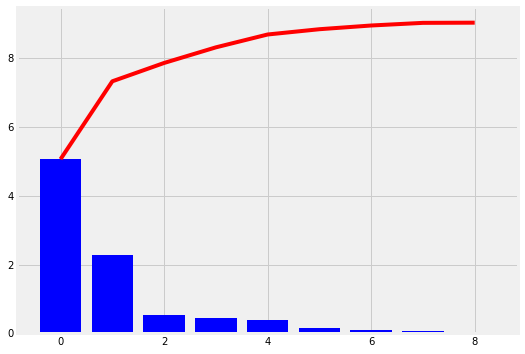

In [138]:
plt.figure(figsize=(8, 6))

components = range(pca.n_components_)

plt.bar(components, pca.explained_variance_, color='b')
plt.plot(components, pca.explained_variance_.cumsum(), color='r')


This tell us that if we view this 9-dimension data on a 2D scatter plot then we would be seeing four-fifths of the total variance in the dataset.

In [139]:
players = [u'Russell Westbrook', u'James Harden', u'Isaiah Thomas',
       u'Anthony Davis', u'DeMar DeRozan', u'Damian Lillard',
       u'DeMarcus Cousins', u'LeBron James', u'Kawhi Leonard',
       u'Stephen Curry', u'Kyrie Irving', u'Karl-Anthony Towns',
       u'Kevin Durant', u'Paul George', u'Andrew Wiggins',
        u'John Wall', 'Giannis Antetokounmpo', 'Harrison Barnes',
          'Kevin Love', 'DeAndre Jordan', 'Serge Ibaka', 'Enes Kanter', 'Rudy Gobert', u'Al Horford',
          'Dwight Howard']

In [140]:
nba_pca.shape

(271, 9)

In [141]:
# nba_pca[0,:2]
nba_pca[:,:2]

array([[ 8.00436427e+00, -2.21529715e+00],
       [ 7.62979921e+00, -3.04858250e+00],
       [ 3.29816588e+00, -2.49869697e+00],
       [ 5.92908103e+00,  3.08761707e+00],
       [ 3.19717509e+00, -1.47948291e+00],
       [ 3.50970970e+00, -1.94237288e+00],
       [ 6.05298877e+00,  9.29065687e-01],
       [ 6.19790946e+00, -1.63423151e+00],
       [ 3.88355897e+00, -8.74823344e-01],
       [ 4.26301467e+00, -2.72036540e+00],
       [ 3.10693673e+00, -2.21495510e+00],
       [ 5.39348404e+00,  3.25924568e+00],
       [ 4.52016816e+00,  4.25980942e-01],
       [ 4.42497865e+00, -1.23448083e+00],
       [ 3.76293688e+00, -1.32956851e+00],
       [ 2.30691434e+00, -8.45092691e-01],
       [ 2.67633860e+00, -1.95113831e+00],
       [ 5.73607109e+00, -3.58353143e+00],
       [ 2.14395330e+00, -1.60255446e+00],
       [ 2.26370493e+00, -1.14739172e+00],
       [ 5.70387622e+00,  1.00939557e+00],
       [ 2.24009707e+00, -5.21889484e-01],
       [ 4.05963943e+00, -2.43532408e+00],
       [ 1.

In [152]:
# nba_pca_df = pd.DataFrame(nba_pca[:, :2], columns=["pc1", "pc2"], index=nba.index)

# plt.figure(figsize=(12, 9))
# plt.scatter(nba_pca_df.pc1, nba_pca_df.pc2)

# for player in players:
#     data = nba_pca_df.loc[player]
#     plt.annotate(player, (data["pc1"], data["pc2"]))

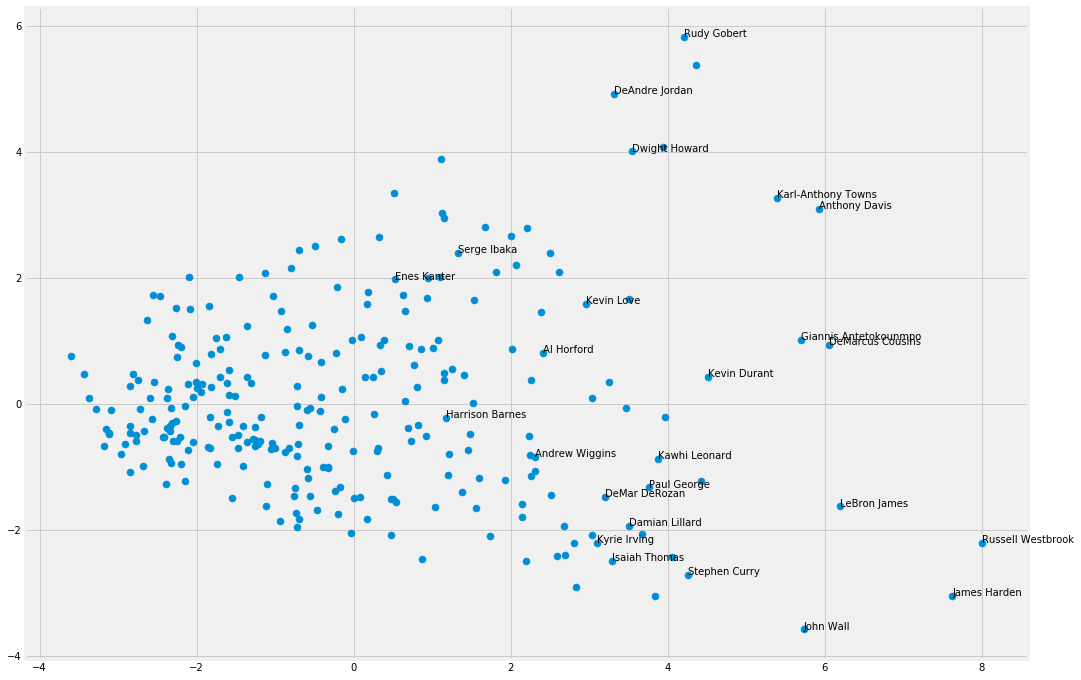

In [153]:
#Plotting NBA PCA Data with names
nba_pca_df = pd.DataFrame(nba_pca[:, :2], columns=['pca1','pca2'], index=nba.index)

plt.figure(figsize=(16,12))
plt.scatter(nba_pca_df.pca1, nba_pca_df.pca2, s=50)

for player in players:
    data = nba_pca_df.loc[player]
    plt.annotate(player, (data['pca1'], data['pca2']))


How do you label the components based on the weights?

Let's print out the component weights with their corresponding variables for PC1, PC2, and PC3

In [161]:
pca.components_[0]

array([0.38943904, 0.2067054 , 0.31267047, 0.29767214, 0.30406529,
       0.21077471, 0.38204575, 0.38533758, 0.43348922])

In [158]:
#Component 1

for col, component in zip(nba.columns, pca.components_[0]):
    print(col, component)


points 0.38943903907432015
offensive_rebs 0.2067054039027892
total_rebounds 0.3126704658303232
assists 0.29767213601129305
steals 0.30406528653918985
blocks 0.21077471448426188
turnovers 0.38204575221647585
minutes 0.38533757941895264
efficiency 0.43348922067219303


In [160]:
#Component 2

for col, componenet in zip(nba.columns, pca.components_[1]):
    print(col,componenet)


points -0.13182641485123914
offensive_rebs 0.5372281720324729
total_rebounds 0.43616832569523745
assists -0.40443072254937174
steals -0.2398055465783561
blocks 0.47338388484308885
turnovers -0.21347851807606705
minutes -0.10496019211401453
efficiency 0.04485473924881781


In [164]:
#Component 3

for component, col in zip(pca.components_[2], nba.columns):
    print(col, component)


points -0.48689798678076596
offensive_rebs 0.1238683225655395
total_rebounds 0.05800339326260096
assists 0.10942463628539517
steals 0.8158842517406791
blocks 0.11468583692138173
turnovers -0.122001750739177
minutes -0.10471785665969807
efficiency -0.1660681617946067


In [165]:
for col, componenet in zip(nba.columns, pca.components_[2]):
    print(col,componenet)


points -0.48689798678076596
offensive_rebs 0.1238683225655395
total_rebounds 0.05800339326260096
assists 0.10942463628539517
steals 0.8158842517406791
blocks 0.11468583692138173
turnovers -0.122001750739177
minutes -0.10471785665969807
efficiency -0.1660681617946067


## Digits

In [169]:
digits = load_digits()

digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [189]:
#Load in the mnist digits data


digits = load_digits()
data = digits.data
numbers = digits.target

#shape of data
data.shape

(1797, 64)

Let's PCA the digits data using two components

In [190]:
#Intialize PCA with 2 components
pca = PCA(n_components=2)  

# project from 64 to 2 dimensions

data_pca = pca.fit_transform(data)

In [191]:
data_pca.shape

(1797, 2)

In [176]:

data_pca

array([[ -1.25946673,  21.27488425],
       [  7.95761184, -20.76869703],
       [  6.99192297,  -9.95598856],
       ...,
       [ 10.80128385,  -6.96025195],
       [ -4.87209833,  12.42396116],
       [ -0.34438963,   6.36554878]])

Plot the prinicpal components of the digits dataset using the number labels as the color-encoding

In [179]:
# data.pca

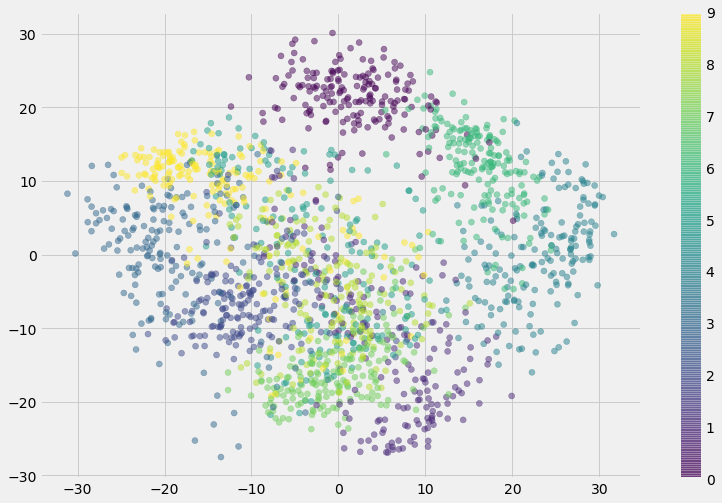

In [188]:
#PLotting digitis pca data

plt.figure(figsize=(12,8))

plt.scatter(data_pca[:,0], data_pca[:,1], c=numbers, alpha=0.5)
plt.colorbar()

In [194]:
pca.components_.shape

(2, 64)

Below is because data is not scaled

In [198]:
#Explained variance of the pca data

pca.explained_variance_


array([179.0069301 , 163.71774688])

In [200]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

Below is because data is not scaled

In [201]:
pca.explained_variance_.cumsum()

array([179.0069301 , 342.72467698])

In [202]:
pca.explained_variance_ratio_.sum()

0.2850936482369908

2 components gets us about 28.5 of the way there, let's see how many components it takes to get 50, 70, and 90%.

In [205]:
#We can set n_components equal to a explained variance ratio value

#50% EVR
pca = PCA(n_components=.5).fit(data)

#Number components
pca.n_components_

5

In [206]:
#70% EVR
pca = PCA(n_components=.7).fit(data)

#Number components
pca.n_components_

9

In [207]:
#90% EVR
pca = PCA(n_components=.9).fit(data)

#Number components
pca.n_components_

21

Visualize EVR curve

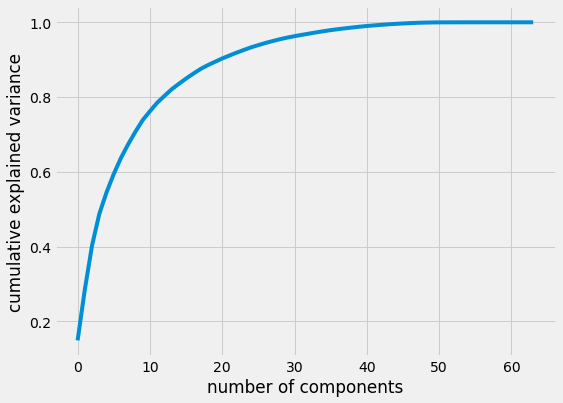

In [208]:
#Intialize and fit digits data using PCA
pca = PCA().fit(data)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [214]:
data.shape

(1797, 64)

In [215]:
cross_val_score(LogisticRegression(), data, numbers, scoring='accuracy', cv=5 ).mean()

0.9210188113360701

In [220]:
pca5 = PCA(n_components=5)
data_pca5 = pca5.fit_transform(data)
cross_val_score(LogisticRegression(), data_pca5, numbers, scoring='accuracy', cv=5 ).mean()

0.8041716164939036

In [221]:
pca2 = PCA(n_components=2)
data_pca2 = pca5.fit_transform(data)
cross_val_score(LogisticRegression(), data_pca2, numbers, scoring='accuracy', cv=5 ).mean()

0.8041716164939036

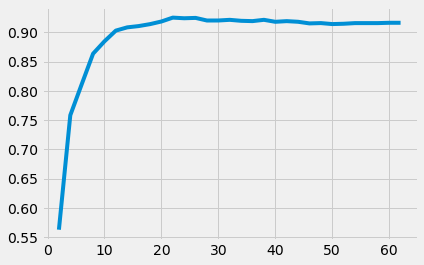

In [226]:
pca_range = range(2, 64, 2)

scores = []

for n in pca_range:
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(data)
    score = cross_val_score(LogisticRegression(), data_pca, numbers, scoring='accuracy', cv=5 ).mean()
    scores.append(score)
    
plt.plot(pca_range, scores)

## Resources:

- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- http://setosa.io/ev/principal-component-analysis/
- https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
- https://github.com/viniciuspantoja/tutorial_PCA/blob/master/Tutorial_PCA.ipynb
- http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
- https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe
- https://towardsdatascience.com/exploratory-data-analysis-into-the-relationship-between-different-types-of-crime-in-london-20c328e193ff
- https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

## In class

1. Use PCA on a supervised learning dataset we've worked with previously to see if PCA-transformed data can produce models as good as the original data.

2. Use time to work on final project.